In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [4]:
print('x_train_full shape: ', X_train_full.shape, 'x_train_full type: ', X_train_full.dtype) 
print('y_train_full shape: ', y_train_full.shape, 'y_train_full type: ', y_train_full.dtype) 
print('x_test shape: ', X_test.shape, 'x_test type: ', X_test.dtype) 
print('y_test shape:', y_test.shape, 'y_test type', y_test.dtype)

x_train_full shape:  (60000, 28, 28) x_train_full type:  uint8
y_train_full shape:  (60000,) y_train_full type:  uint8
x_test shape:  (10000, 28, 28) x_test type:  uint8
y_test shape: (10000,) y_test type uint8


Images are uint8. That is, each pixel in the images has a value between 0 and 255. Because we want to use a descending gradient, we need to set these values between 0 and 1. For this, it is enough to divide the images by 255.

In [5]:
x_valid, x_train = X_train_full[50000:] / 255.0, X_train_full[:50000] / 255.0
y_valid, y_train = y_train_full[50000:], y_train_full[:50000]

In [6]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]), 
    keras.layers.Dense(300, activation="relu"), 
    keras.layers.Dense(100, activation="relu"), 
    keras.layers.Dense(10, activation="softmax") ])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [10]:
history = model.fit(x_train, y_train, epochs=30, validation_data=(x_valid, y_valid))

Epoch 1/30


1563/1563 [==============================] - 13s 7ms/step - loss: 0.7212 - accuracy: 0.7680 - val_loss: 0.5708 - val_accuracy: 0.7949
Epoch 2/30
1563/1563 [==============================] - 11s 7ms/step - loss: 0.4953 - accuracy: 0.8295 - val_loss: 0.4820 - val_accuracy: 0.8259
Epoch 3/30
1563/1563 [==============================] - 11s 7ms/step - loss: 0.4469 - accuracy: 0.8449 - val_loss: 0.4584 - val_accuracy: 0.8414
Epoch 4/30
1563/1563 [==============================] - 10s 7ms/step - loss: 0.4188 - accuracy: 0.8537 - val_loss: 0.4414 - val_accuracy: 0.8478
Epoch 5/30
1563/1563 [==============================] - 10s 7ms/step - loss: 0.3969 - accuracy: 0.8614 - val_loss: 0.4115 - val_accuracy: 0.8531
Epoch 6/30
1563/1563 [==============================] - 10s 7ms/step - loss: 0.3811 - accuracy: 0.8659 - val_loss: 0.3972 - val_accuracy: 0.8598
Epoch 7/30
1563/1563 [==============================] - 10s 7ms/step - loss: 0.3673 - accuracy: 0.8714 - val_loss: 0.3865 - val_

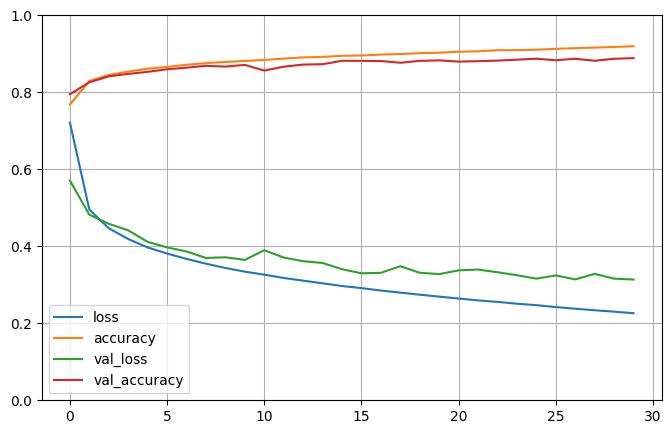

In [11]:
import pandas as pd 
import matplotlib.pyplot as plt 
pd.DataFrame(history.history).plot(figsize=(8, 5)) 
plt.grid(True) 
plt.gca().set_ylim(0, 1)  # set the vertical range to [0-1] 
plt.show()

In [13]:
model.evaluate(X_test/255, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.3396 - accuracy: 0.8809


[0.339642196893692, 0.8809000253677368]